In [11]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dic = {'Alef': 0,
 'Ayin': 1,
 'Bet': 2,
 'Dalet': 3,
 'Gimel': 4,
 'He': 5,
 'Het': 6,
 'Kaf': 7,
 'Kaf-final': 8,
 'Lamed': 9,
 'Mem': 10,
 'Mem-medial': 11,
 'Nun-final': 12,
 'Nun-medial': 13,
 'Pe': 14,
 'Pe-final': 15,
 'Qof': 16,
 'Resh': 17,
 'Samekh': 18,
 'Shin': 19,
 'Taw': 20,
 'Tet': 21,
 'Tsadi-final': 22,
 'Tsadi-medial': 23,
 'Waw': 24,
 'Yod': 25,
 'Zayin': 26}

In [4]:
def load_data(path, train_test_split=0.7):
    n_datapoints = 0; 
    
    for filename in os.listdir(path):
        n_datapoints +=1
        
    
    flag = 1; 
    
    count = 0
    for filename in os.listdir(path):
        img = np.double(cv2.imread(path+"/"+filename,0));
        
        if(flag == 1):
            
            shape = np.shape(img);
            
            all_images = np.zeros([n_datapoints, shape[1], shape[0]])
            all_labels = np.zeros([n_datapoints])
  
            flag = 0; 
     
        
        label = dic[filename.split("_")[0]]
        
        all_images[count] = img
        all_labels[count] = label
        
        
        count += 1 
        
        
    n_training_points = int(train_test_split * n_datapoints)
    
    perm = np.random.permutation(n_datapoints)
    train_indices = perm[:n_training_points]
    test_indices = perm[n_training_points:]
    
    x_train = all_images[train_indices]
    y_train = all_labels[train_indices]
    
    x_test = all_images[test_indices]
    y_test = all_labels[test_indices]
    
        
    return x_train, y_train, x_test, y_test
    

In [5]:
x_train, y_train, x_test, y_test = load_data("/Users/Karlsson/Documents/Skola/Handwriting_Recognition/monkbrill_same_size/")

In [6]:
np.shape(y_test)

(1662,)

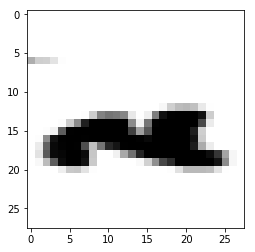

In [12]:
plt.imshow(x_train[1],cmap="gray")

In [13]:
batch_size = 128
num_classes = 27
epochs = 12

In [14]:
img_rows, img_cols = 28, 28

In [15]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3875, 28, 28, 1)
3875 train samples
1662 test samples


In [17]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3875 samples, validate on 1662 samples
Epoch 1/12
3875/3875 [==============================] - 12s 3ms/step - loss: 2.2387 - acc: 0.3706 - val_loss: 1.1714 - val_acc: 0.6799
Epoch 2/12
3875/3875 [==============================] - 11s 3ms/step - loss: 0.9486 - acc: 0.7453 - val_loss: 0.7776 - val_acc: 0.7930
Epoch 3/12
3875/3875 [==============================] - 12s 3ms/step - loss: 0.6923 - acc: 0.8119 - val_loss: 0.5329 - val_acc: 0.8694
Epoch 4/12
3875/3875 [==============================] - 12s 3ms/step - loss: 0.5432 - acc: 0.8449 - val_loss: 0.5565 - val_acc: 0.8526
Epoch 5/12
3875/3875 [==============================] - 12s 3ms/step - loss: 0.4943 - acc: 0.8627 - val_loss: 0.4423 - val_acc: 0.8833
Epoch 6/12
3875/3875 [==============================] - 13s 3ms/step - loss: 0.4042 - acc: 0.8841 - val_loss: 0.4523 - val_acc: 0.8761
Epoch 7/12
3875/3875 [==============================] - 12s 3ms/step - loss: 0.3571 - acc: 0.8919 - val_loss: 0.4107 - val_acc: 0.8875
Epoch 8

In [21]:
model.save("./baseline_cnn.h5")